In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# URL to your raw CSV file
url = "https://raw.githubusercontent.com/LourensVanDerBijl/Integrated_Project/refs/heads/main/insurance_claims-cleaned.csv"

# Load the CSV file into a DataFrame using the correct delimiter
df = pd.read_csv(url, sep=';')

# Inspect the first few rows
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014/10/17           OH   
1                 228   42         342868       2006/06/27           IN   
2                 134   29         687698       2000/09/06           OH   
3                 256   41         227811       1990/05/25           IL   
4                 228   44         367455       2014/06/06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         

In [3]:
# Check for missing values
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])  # Only show columns with missing values


authorities_contacted    91
dtype: int64


In [4]:
numerical_cols = df.select_dtypes(include=[np.number]).columns  # Select numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [5]:
categorical_cols = df.select_dtypes(include=[object]).columns  # Select categorical columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


In [6]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])  # Should return no missing values


Series([], dtype: int64)


In [7]:
print(df.describe())


       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

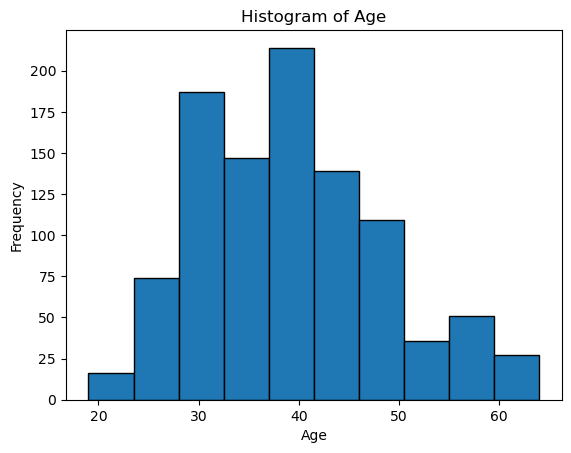

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014/10/17           OH   
1                 228   42         342868       2006/06/27           IN   
2                 134   29         687698       2000/09/06           OH   
3                 256   41         227811       1990/05/25           IL   
4                 228   44         367455       2014/06/06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... injury_claim property_claim vehicle_claim  auto_make  \
0       466132  ...         

In [8]:
# Bin age into categories
bin_edges = [0, 30, 55, 100]
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

# Bin months_as_customer into categories
bin_edges_customer = [0, 25, 150, 500]
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

# Create new feature "Contract Years"
df['Contract_Years'] = df['months_as_customer'] / 12

# Convert fraud_reported to numeric
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

# Visualize age distribution
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Check resulting DataFrame
print(df.head())

In [11]:
# Create "ages_category" column by binning age
bin_edges = [0, 30, 55, 100]
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

# Create "customer_category" by binning months_as_customer
bin_edges_customer = [0, 25, 150, 500]
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

# Create the "Contract_Years" feature
df['Contract_Years'] = df['months_as_customer'] / 12

# Calculate total premiums paid
df['total_premiums_paid'] = (df['policy_annual_premium'] / 12) * df['months_as_customer']

# Calculate net value of customer
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

# Display the first rows to confirm
print(df.head())

# Save the resulting DataFrame to CSV
df.to_csv('Advanced_Features_Claims_Data.csv', index=False)


   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014/10/17           OH   
1                 228   42         342868       2006/06/27           IN   
2                 134   29         687698       2000/09/06           OH   
3                 256   41         227811       1990/05/25           IL   
4                 228   44         367455       2014/06/06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... vehicle_claim  auto_make auto_model auto_year  \
0       466132  ...         52080  